# Exploratory Data Analysis on GoEmotions Dataset #



## Setup ##

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.data.path.append(r"C:\Users\maewa\AppData\Roaming\nltk_data")
from collections import Counter 

# path of each of the three csv files of the GoEmotions dataset
csv_path1 = '../data/data/full_dataset/goemotions_1.csv'
csv_path2 = '../data/data/full_dataset/goemotions_2.csv'
csv_path3 = '../data/data/full_dataset/goemotions_3.csv'

# List of the three files
csv_files = [csv_path1, csv_path2, csv_path3]

# generate DataFrame from each file then concatenate all three DataFrames into one
df = pd.concat((pd.read_csv(filename) for filename in csv_files), ignore_index=True) 

#print(df.head())


## Analyzing Emotion Distribution ##

In [3]:
# Create a list of the 27 emotion categories in the dataset
emotions = ['admiration','amusement','anger','annoyance','approval','caring','confusion','curiosity','desire','disappointment','disapproval','disgust','embarrassment','excitement','fear','gratitude','grief','joy','love','nervousness','optimism','pride','realization','relief','remorse','sadness','surprise','neutral']

# Calculate the frequency of each emotion
emotion_counts = df[emotions].sum()

# sort counts
emotion_counts = emotion_counts.sort_values(ascending=False)

# print results
print("Emotion Frequency Counts:")
print(emotion_counts)

Emotion Frequency Counts:
neutral           55298
approval          17620
admiration        17131
annoyance         13618
gratitude         11625
disapproval       11424
curiosity          9692
amusement          9245
realization        8785
optimism           8715
disappointment     8469
love               8191
anger              8084
joy                7983
confusion          7359
sadness            6758
caring             5999
excitement         5629
surprise           5514
disgust            5301
desire             3817
fear               3197
remorse            2525
embarrassment      2476
nervousness        1810
pride              1302
relief             1289
grief               673
dtype: int64


### Visualizing Frequency of Emotions ###

C:\Users\maewa\AppData\Local\Temp\ipykernel_26760\545963901.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.values, y=emotion_counts.index,palette='viridis')


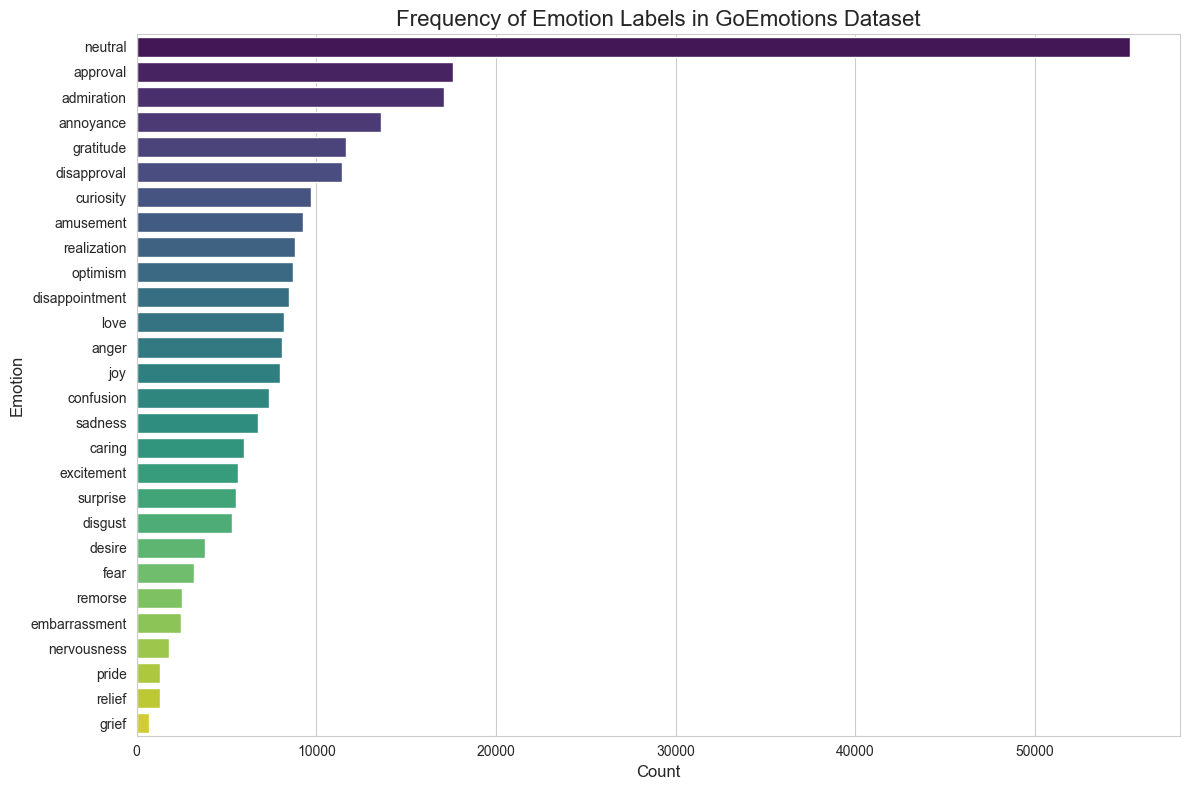

c:\Users\maewa\OneDrive\Coding\IntProjectI\eda


<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")

# create bar plot
sns.barplot(x=emotion_counts.values, y=emotion_counts.index,palette='viridis')

# add titles and labels
plt.title('Frequency of Emotion Labels in GoEmotions Dataset', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Emotion', fontsize=12)

# display plot
plt.tight_layout()
plt.show()

## Analyzing Number of labels per Comment ##

In [ ]:
# Count the number of labels for each comment
df['label_count'] = df[emotions].sum(axis=1)

# Calculate the average number of labels per comment
average_labels = df['label_count'].mean()

print("---Analysis of Labels Per Comment---")
print(f"Average number of labels per comment: {average_labels:.2f}\n")

# Calculate the frequency of each label count
label_frequency = df['label_count'].value_counts().sort_index()
print("Frequency of label counts: ")
print(label_frequency)

---Analysis of Labels Per Comment---
Average number of labels per comment: 1.18

Frequency of label counts: 
label_count
0       3411
1     171820
2      31187
3       4218
4        399
5        106
6         53
7         20
8          6
9          3
10         1
12         1
Name: count, dtype: int64


### Visualizing Label Counts ###

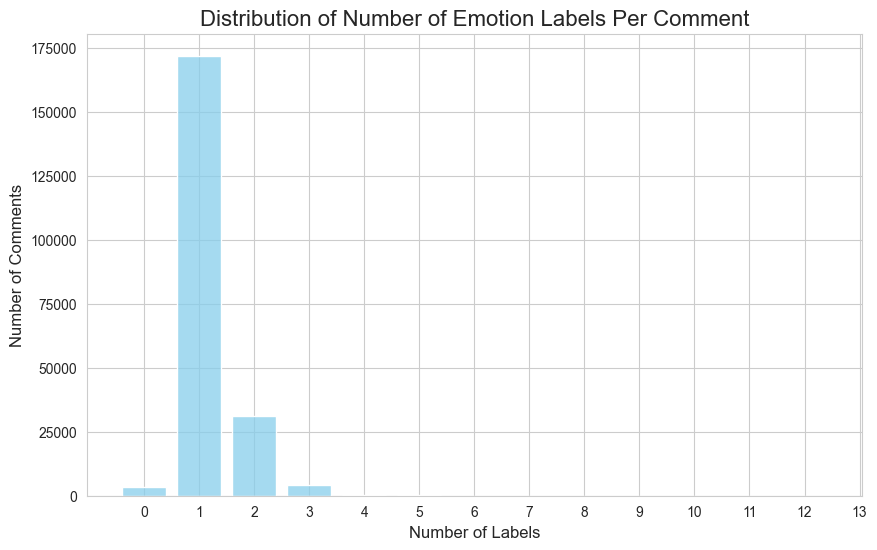

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.histplot(
    data=df,
    x='label_count',
    discrete=True,
    color='skyblue',
    shrink=.8
)

plt.title('Distribution of Number of Emotion Labels Per Comment', fontsize=16)
plt.xlabel('Number of Labels', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.xticks(range(int(df['label_count'].max()) + 2))
plt.show()


### Visualizing Frequently Co-Occuring Emotions ###

Isolate the data for the numeric values and calculate co-occurence matrix using dot product.

In [ ]:
# Isolate numeric emotion label columns
emotion_df = df[emotions]

# use dot product to calculate co-occurance matrix
co_occurence_matrix = emotion_df.T.dot(emotion_df)

# set diagonal to zero -this is just the total count of each emotion
np.fill_diagonal(co_occurence_matrix.values, 0)

Generate heatmap.

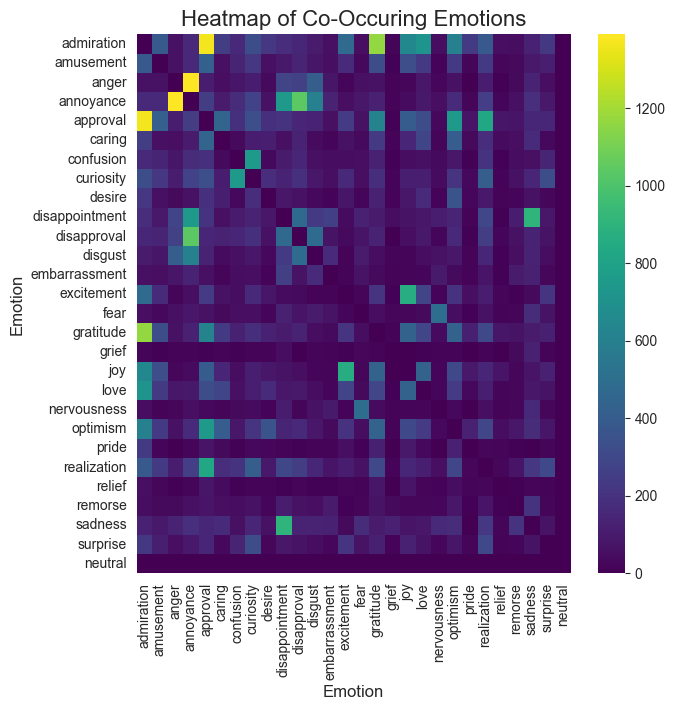

In [ ]:
plt.figure(figsize=(7,7))
sns.set_style("whitegrid")

sns.heatmap(
    data=co_occurence_matrix,
    annot=False,
    cmap="viridis"
)

plt.title("Heatmap of Co-Occuring Emotions", fontsize=16)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Emotion", fontsize=12)
plt.show()

## Analyzing length of comments ##

### Average Words Per Comment for Dataset ###

In [ ]:
# NLTK Resources, run once and comment out
#nltk.download('punkt')
# nltk.download('stopwords')

In [ ]:
# Calculating char length for each comment
df['char_length'] = df['text'].str.len()

# Calculating word count per comment by splitting on spaces
df['word_count'] = df['text'].str.split().str.len()

# Display new stats
print(df[['char_length', 'word_count']].describe()) 

         char_length     word_count
count  211225.000000  211225.000000
mean       69.299572      12.997188
std        36.536746       6.676105
min         2.000000       1.000000
25%        39.000000       7.000000
50%        67.000000      13.000000
75%        97.000000      18.000000
max       703.000000      33.000000


### Histogram for Length of Comment for Whole Dataset ###

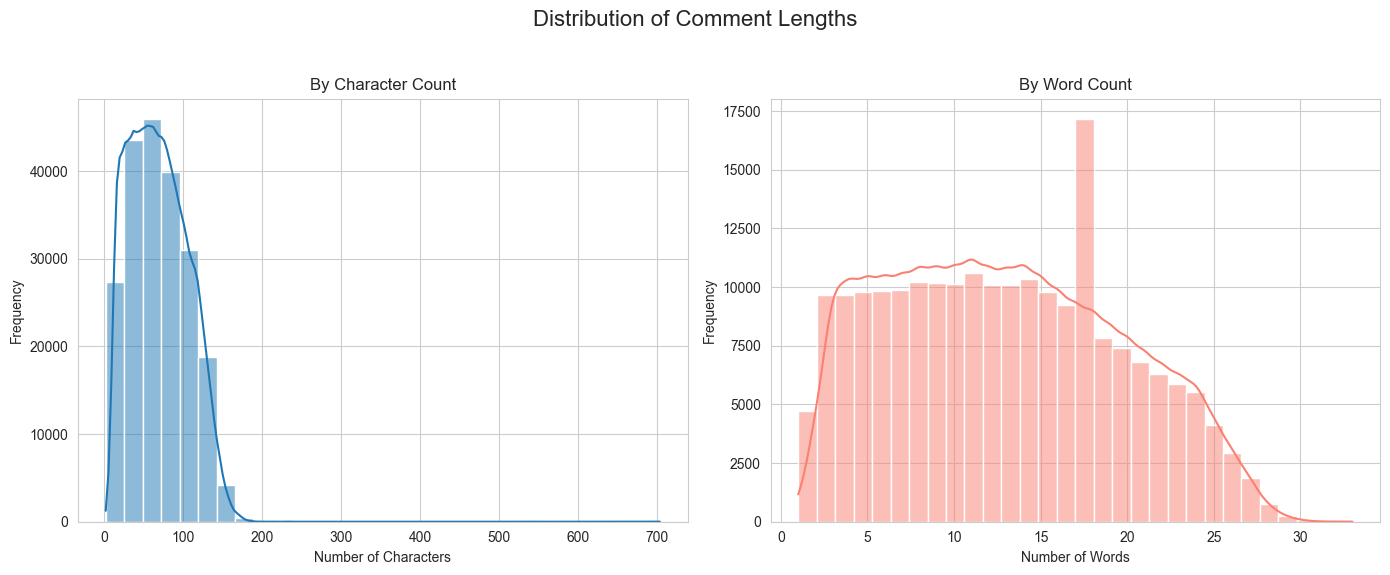

In [ ]:
sns.set_style("whitegrid")

# Create figure with two subplots
fig, axes = plt.subplots(1,2, figsize=(14,6))
fig.suptitle("Distribution of Comment Lengths", fontsize=16)

# PLotting number of characters distribution
sns.histplot(ax=axes[0], data=df, x='char_length', bins=30, kde=True)
axes[0].set_title('By Character Count')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')

#Plotting Word Count Distribution
sns.histplot(ax=axes[1], data=df, x='word_count', bins=30, kde=True, color='salmon')
axes[1].set_title('By Word Count')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

### Boxplot for Length of Comments in the Dataset ###

C:\Users\maewa\AppData\Local\Temp\ipykernel_5000\1272523876.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['word_count'], palette='viridis')


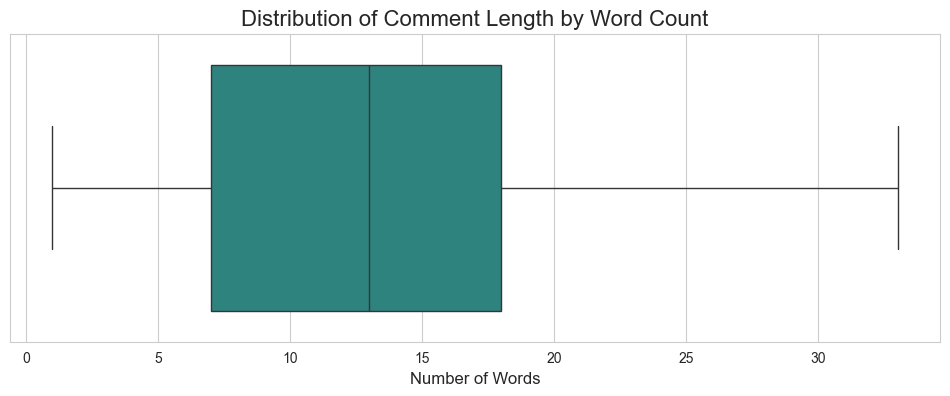

In [ ]:
sns.set_style('whitegrid')

# Boxplot for Comment Length in overall dataset
plt.figure(figsize=(12,4))
sns.boxplot(x=df['word_count'], palette='viridis')
plt.title("Distribution of Comment Length by Word Count", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.show()


### Boxplot for Length of Comment by Emotion ###

In [ ]:
# Create a column in df with actual emotion names <- same problem as below, only the first emotion is read
# Restructure Data for capturing multi-label info
df_long = df.melt(
    id_vars=['id'], 
    value_vars=emotions, 
    var_name='emotion',
    value_name='is_present'
    )

# Filter, keeping rows where is_present == 1
df_long_present = df_long[df_long['is_present']==1].copy()

# Merge the token data in using the id column as key
df_final = pd.merge(df_long_present, df[['id', 'word_count']], on='id')

# Show before and after reshaping
print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"\nReshaped DataFrame: {df_final.shape}")
print(f"\nThe {df.shape[0]} original comments correspond to {df_final.shape[0]} total emotion labels")




Original DataFrame shape: (211225, 40)

Reshaped DataFrame: (961706, 4)

The 211225 original comments correspond to 961706 total emotion labels


C:\Users\maewa\AppData\Local\Temp\ipykernel_5000\1923113058.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='word_count', y='emotion', data=df_final, palette='viridis')


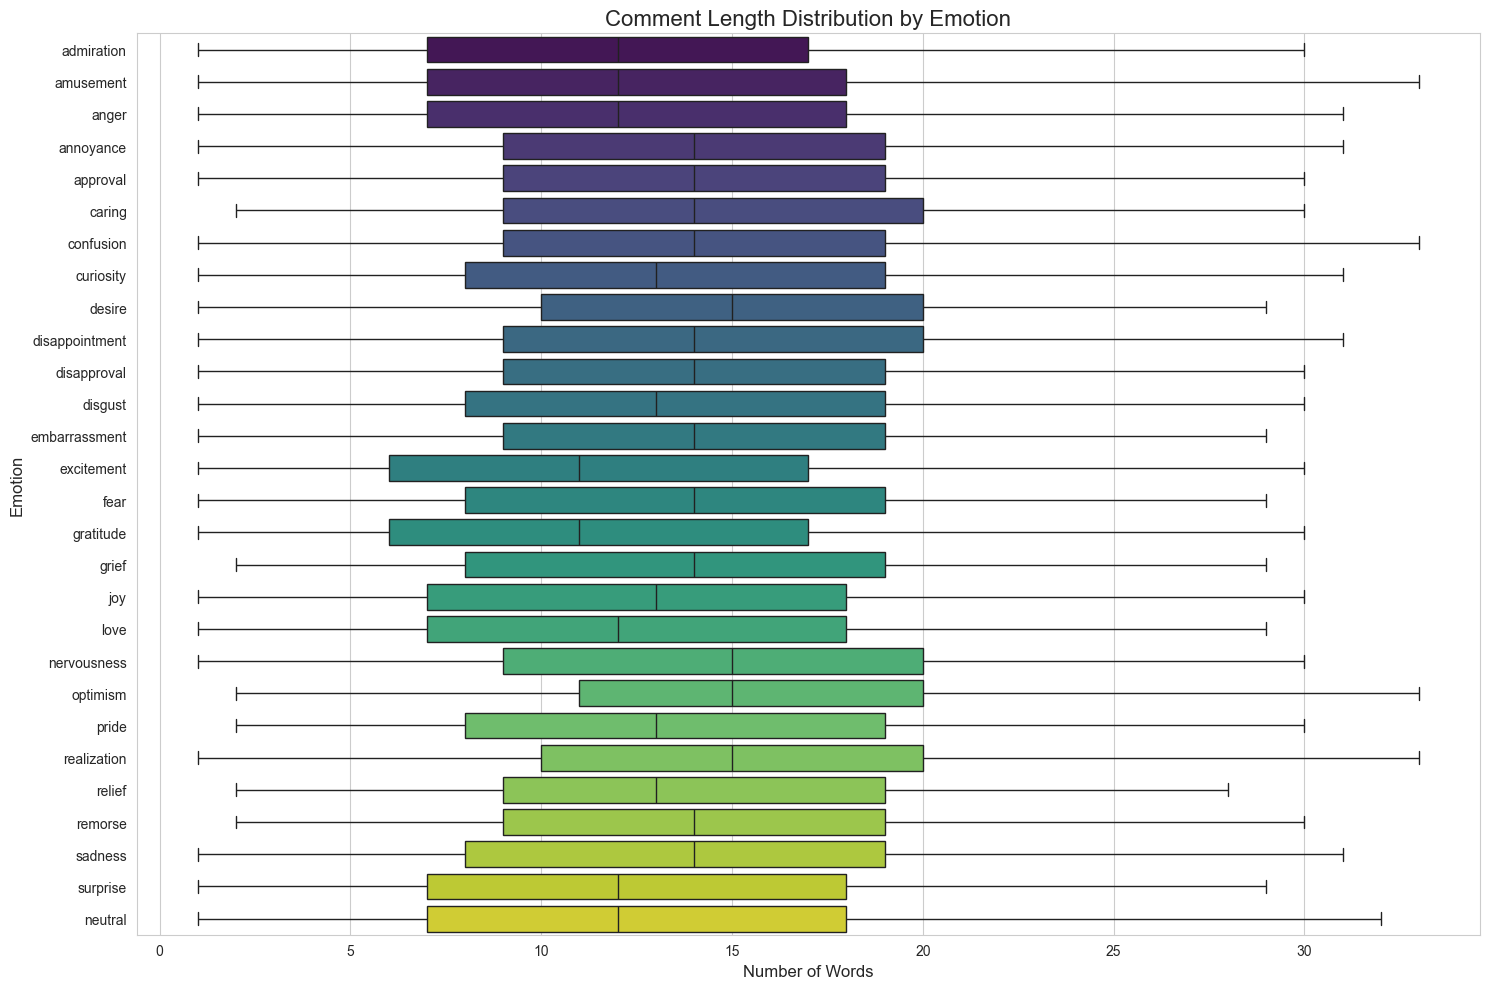

In [ ]:
# Boxplots comparing comment lengths by emotion

plt.figure(figsize=(15,10))

sns.boxplot(x='word_count', y='emotion', data=df_final, palette='viridis')

plt.title("Comment Length Distribution by Emotion", fontsize=16)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Emotion", fontsize=12)
plt.tight_layout()
plt.show()


### Histogram of Length of Comment by Emotion ###

## Analyzing Vocabulary ##

### Tokenizing Comments ###

In [ ]:
#nltk.download('punkt_tab')

In [ ]:
# Apply NLTK word tokenizer to comments in 'text' column of dataframe
df['tokens'] =df['text'].apply(nltk.word_tokenize)

# Display text and tokens for a few rows
print(df[['text', 'tokens']].head())

                                                text  \
0                                    That game hurt.   
1   >sexuality shouldn’t be a grouping category I...   
2     You do right, if you don't care then fuck 'em!   
3                                 Man I love reddit.   
4  [NAME] was nowhere near them, he was by the Fa...   

                                              tokens  
0                              [That, game, hurt, .]  
1  [>, sexuality, shouldn, ’, t, be, a, grouping,...  
2  [You, do, right, ,, if, you, do, n't, care, th...  
3                          [Man, I, love, reddit, .]  
4  [[, NAME, ], was, nowhere, near, them, ,, he, ...  


### Part-of-Speech (POS) Tagging & Lemmatization ###

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# download these then comment out
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer()

# function converts NLTKs POS tags to a format WordNetLemmatizer gets
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # Noun is the default
    

# This function should get the tokens and their pos tags
def tag(tokens):
    return nltk.pos_tag(tokens)

#print(nltk.pos_tag(["test", "sentence"]))

df['tags'] = df['tokens'].apply(tag)

# this function should lemmatize the tagged tokens
def lemmatize(pos_tags):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

df['lemmatized'] = df['tags'].apply(lemmatize)


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\maewa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### Remove Stopwords ###

In [ ]:
from nltk.corpus import stopwords

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Adding 'name' as this is used to redact proper names in the dataset
stop_words.add('name')

# Function that will remove stopwords from list of tokens 
def remove_stopwords(tokens):
    return [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Apply function, creating a column of filtered tokens in the dataframe
df['tokens_no_stop'] = df['lemmatized'].apply(remove_stopwords)

print(df[['tokens','tokens_no_stop']].head())


                                              tokens  \
0                              [That, game, hurt, .]   
1  [>, sexuality, shouldn, ’, t, be, a, grouping,...   
2  [You, do, right, ,, if, you, do, n't, care, th...   
3                          [Man, I, love, reddit, .]   
4  [[, NAME, ], was, nowhere, near, them, ,, he, ...   

                                      tokens_no_stop  
0                                       [game, hurt]  
1  [sexuality, grouping, category, make, differen...  
2                                [right, care, fuck]  
3                                [man, love, reddit]  
4                            [nowhere, near, falcon]  


### Bar Plot of Word Frequency for Dataset ###

In [ ]:
# Create a list of tokens from all comments
all_tokens = [token for sublist in df['tokens_no_stop'] for token in sublist]

# Get the most common tokens
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(20)

# Create a dataframe to visualize 
common_words_df = pd.DataFrame(most_common_words, columns=['word', 'frequency'])

C:\Users\maewa\AppData\Local\Temp\ipykernel_5000\3649394659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='frequency', y='word', palette='viridis')


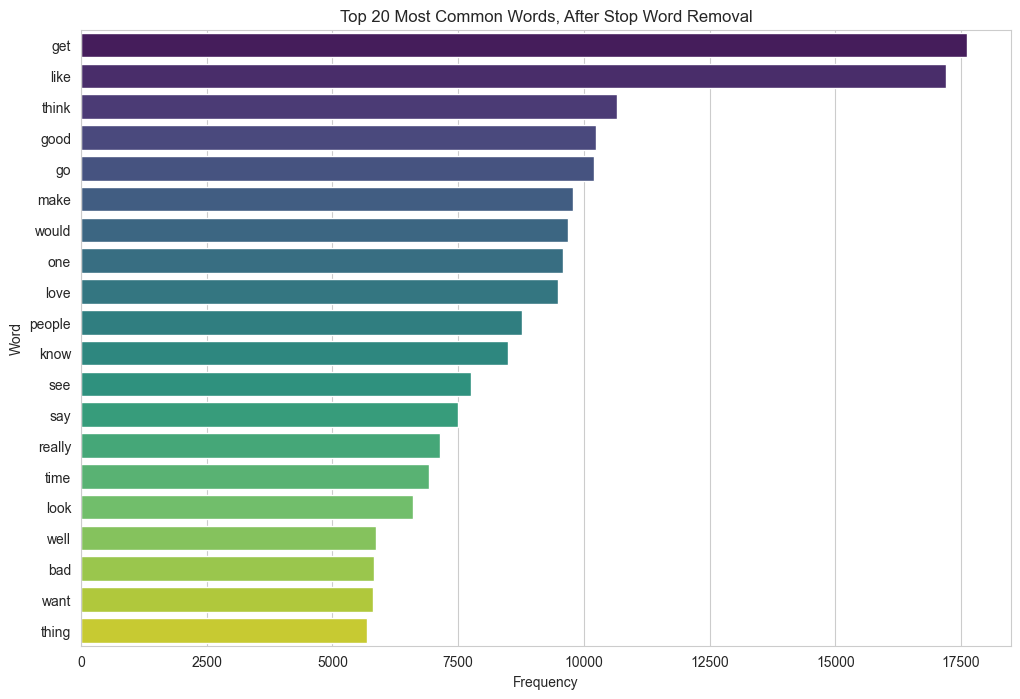

In [ ]:
# Plot the most common words
plt.figure(figsize=(12,8))
sns.barplot(data=common_words_df, x='frequency', y='word', palette='viridis')
plt.title('Top 20 Most Common Words, After Stop Word Removal')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

### Vocabulary Analysis for Each Emotion * FIX THIS ###

In [ ]:
# Merge the token data without stopwords in using the id column as key
df_final_no_stop = pd.merge(df_long_present, df[['id', 'tokens_no_stop']], on='id')

# Group by emotion and aggregate list of tokens from each
#tokens_per_emotion = df_final_no_stop.groupby('emotion')['tokens_no_stop'].sum() # DON'T DO THIS it hangs the notebook 

# TRY THIS INSTEAD
tokens_per_emotion = (df_final_no_stop).groupby('emotion')['tokens_no_stop'].apply(lambda x: [token for tokens in x for token in tokens])

# Dictionary to store the results
vocab_results = {}

# Use Counter to get the frequency of each word
print("--- Top 10 Most Common Words per Emotion")
for emotion, all_tokens in tokens_per_emotion.items():
    word_freq = Counter(all_tokens)

    # Store the 10 most common words
    most_common_words = word_freq.most_common(10)
    vocab_results[emotion] = most_common_words

    # Print results
    print(f"\nEmotion: {emotion.capitalize()}")
    words_str = ','.join([f"{word} ({freq})" for word, freq in most_common_words])
    print(words_str)

--- Top 10 Most Common Words per Emotion

Emotion: Admiration
good (9339),great (6931),like (5850),love (4430),get (3816),one (3682),look (3507),awesome (3216),really (3146),best (3041)

Emotion: Amusement
lol (11728),haha (3119),like (3047),get (2678),funny (2635),fun (2136),make (2114),think (1914),lmao (1821),laugh (1732)

Emotion: Anger
fuck (3940),get (2629),hate (2358),like (2254),people (2074),go (1622),bad (1446),make (1424),would (1154),say (1132)

Emotion: Annoyance
get (5469),like (5212),people (3804),make (3126),go (2752),bad (2680),think (2648),say (2640),fuck (2635),one (2541)

Emotion: Approval
like (6395),get (6183),good (4862),think (4077),make (3607),go (3589),one (3482),would (3230),right (3065),people (3058)

Emotion: Caring
get (3369),good (2604),go (1781),like (1585),feel (1362),help (1337),well (1318),need (1280),make (1225),hope (1148)

Emotion: Confusion
think (3039),know (2804),like (2558),get (2356),would (1742),sure (1726),say (1424),people (1402),go (1397),

C:\Users\maewa\AppData\Local\Temp\ipykernel_5000\646800008.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='frequency', y='word', ax=ax, palette='viridis')
C:\Users\maewa\AppData\Local\Temp\ipykernel_5000\646800008.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='frequency', y='word', ax=ax, palette='viridis')
C:\Users\maewa\AppData\Local\Temp\ipykernel_5000\646800008.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words_df, x='frequency', y='word', ax=ax, palette='vi

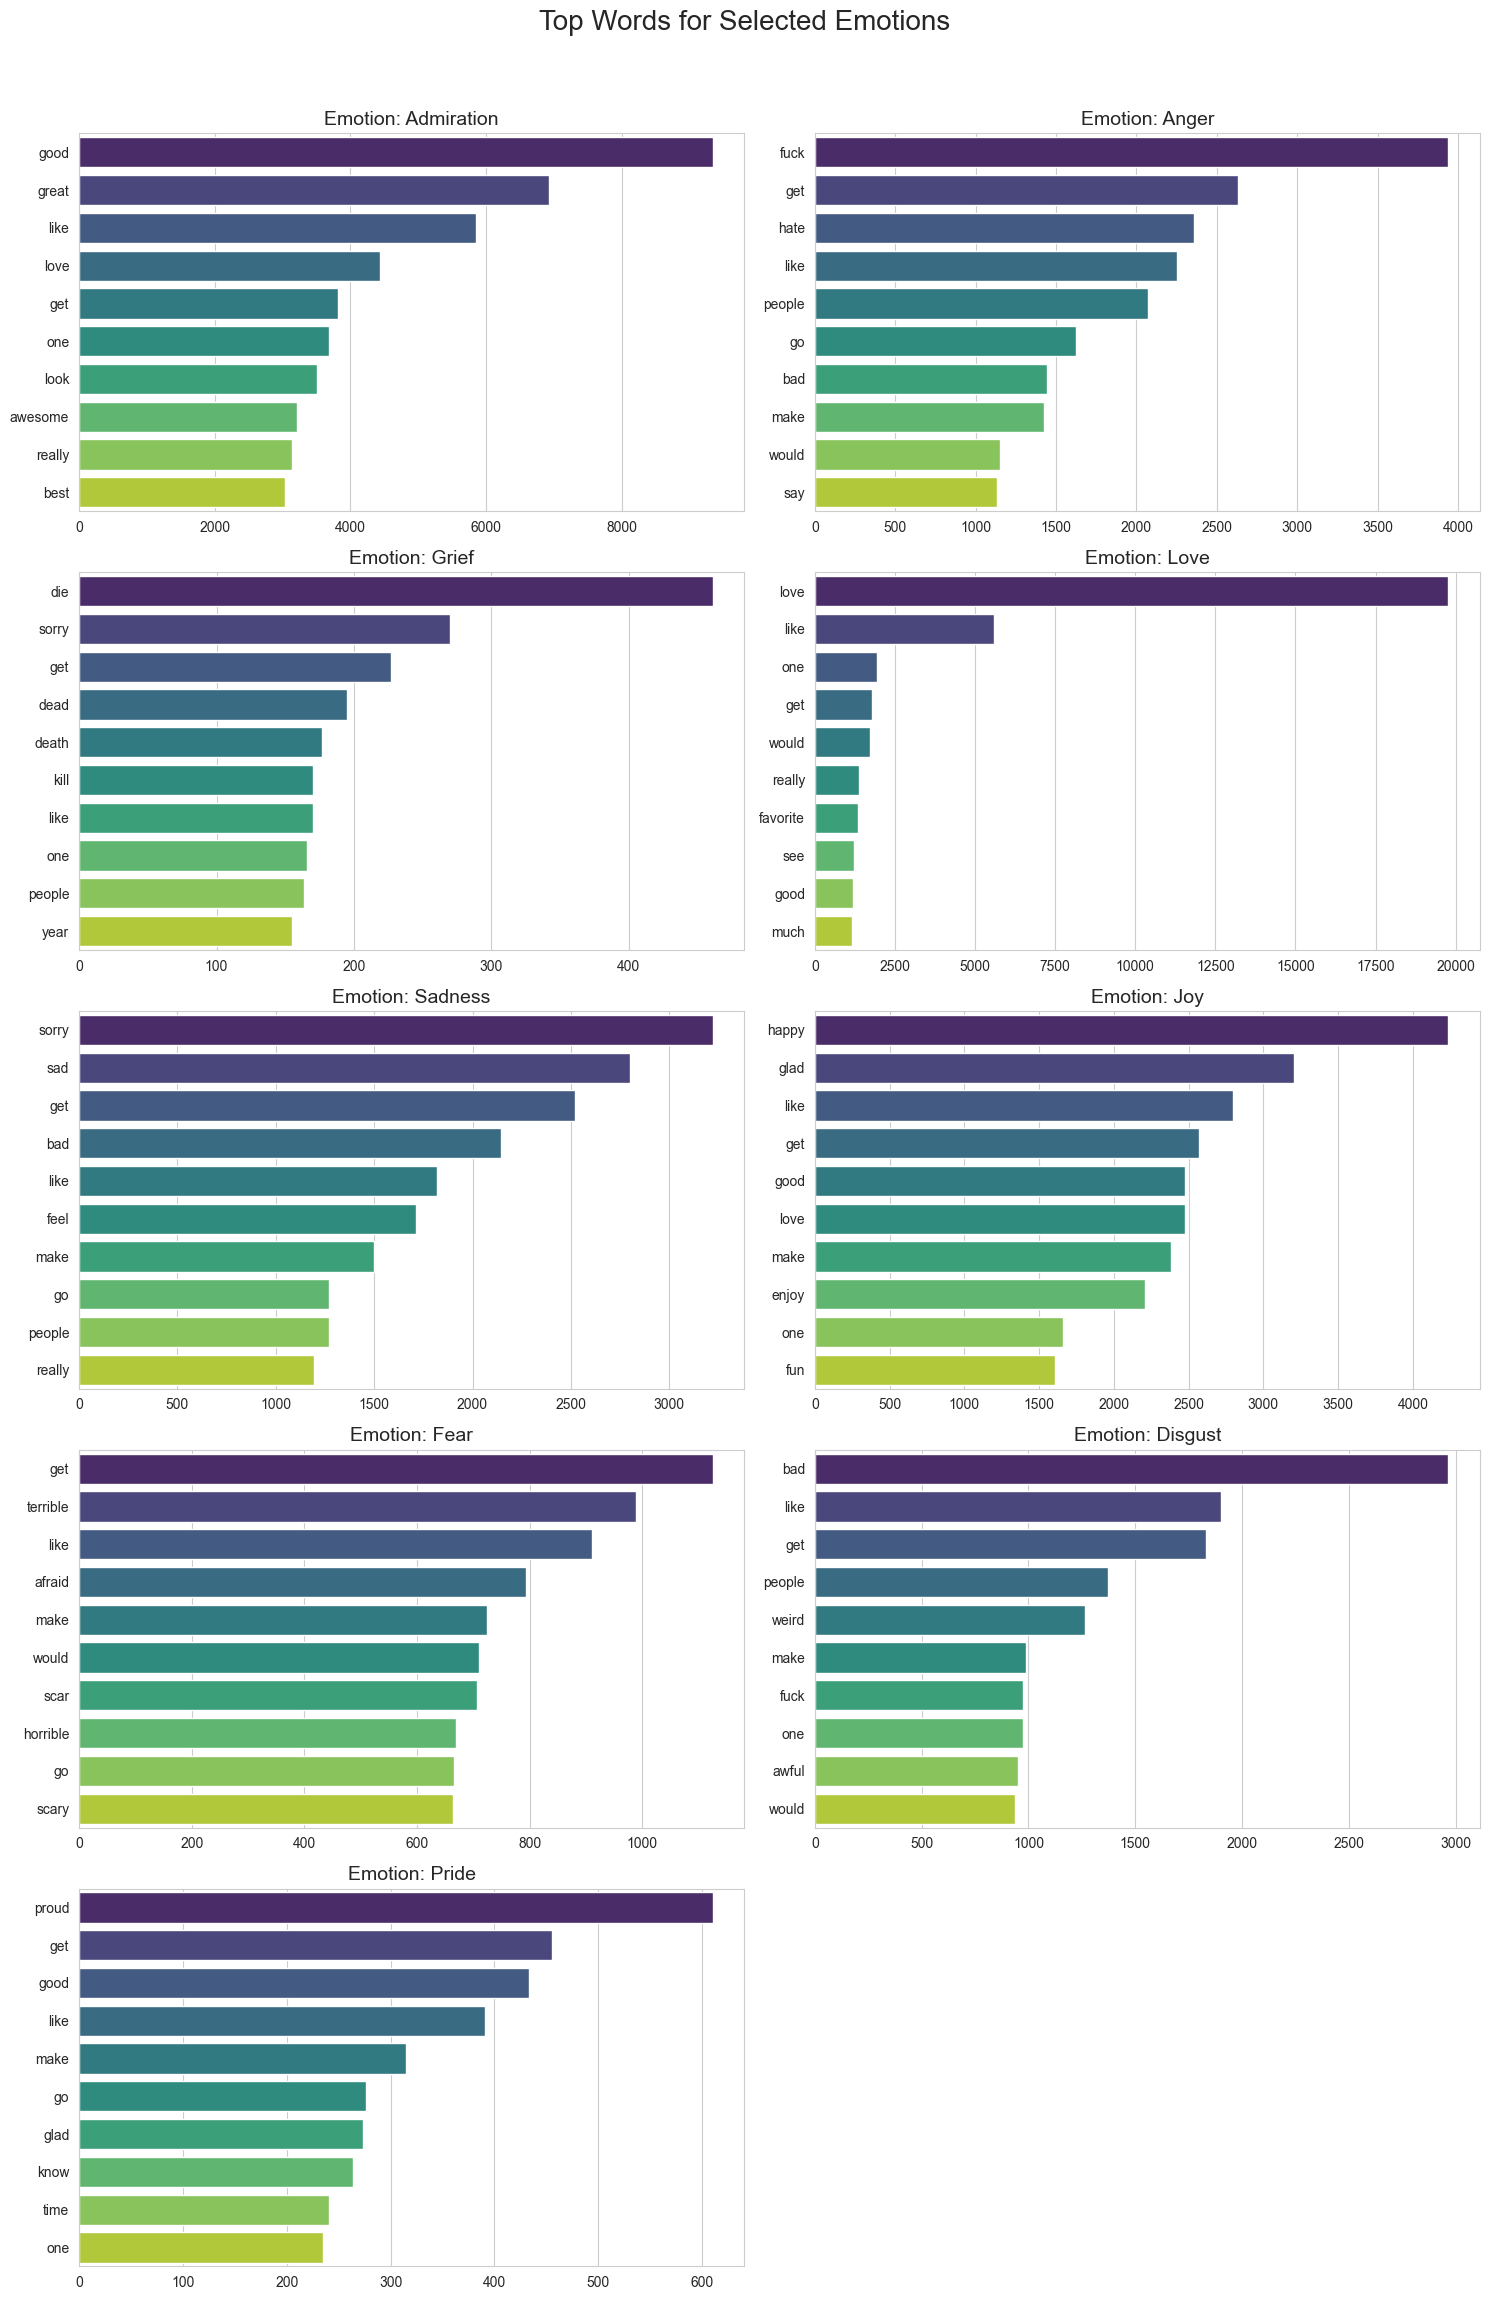

In [ ]:
# Select a few emotions to visualize
emotions_to_plot = ['admiration', 'anger', 'grief', 'love', 'sadness', 'joy', 'fear', 'disgust', 'pride']

num_emotions = len(emotions_to_plot)
fig, axes = plt.subplots((num_emotions + 1) // 2, 2, figsize=(15, num_emotions * 2.5))
axes = axes.flatten()
fig.suptitle("Top Words for Selected Emotions", fontsize=20, y=1.02)

for i, emotion in enumerate(emotions_to_plot):
    ax = axes[i]
    if emotion in vocab_results: 
        common_words_df = pd.DataFrame(vocab_results[emotion], columns=['word', 'frequency'])

        sns.barplot(data=common_words_df, x='frequency', y='word', ax=ax, palette='viridis')
        ax.set_title(f'Emotion: {emotion.capitalize()}', fontsize=14)
        ax.set_xlabel('')   
        ax.set_ylabel('')
    else:
        ax.set_visible(False)

# Hide unused axes
for j in range(i + 1, len(axes)): 
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



### Most Common n-Grams ###

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate Vectorizer with n-gram range to include bigrams and trigrams
vectorizer = CountVectorizer(ngram_range=(2,3))

# fitting the vectorizer to the data to count the n-grams
X = vectorizer.fit_transform(df['text'])

# get the n-grams or features
feature_names = vectorizer.get_feature_names_out()

# Count the instances of each n-gram and flatten to a 1D array
counts = X.sum(axis=0).A1

# create new dataframe for n-grams and their counts
ngram_counts = pd.DataFrame({'ngram': feature_names, 'count': counts})

# Sort and print the most frequent ngrams
print(ngram_counts.sort_values('count', ascending=False).head(10))

            ngram  count
288472     in the   6854
631989    this is   5939
741440     you re   5873
430952     of the   5517
643632      to be   4771
579992  thank you   3987
203117    for the   3894
441316     on the   3495
316769     it was   3478
280693     if you   3188


C:\Users\maewa\AppData\Local\Temp\ipykernel_5000\626462833.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=top_bigrams, palette='viridis')


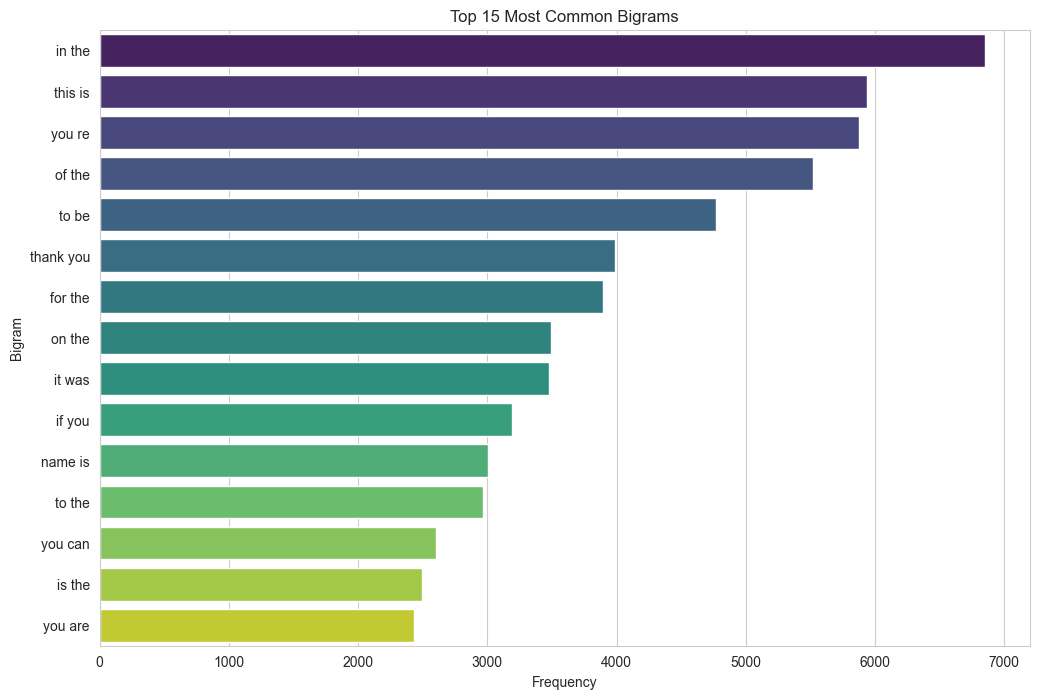

In [ ]:
# Filter for bigrams
bigram_counts = ngram_counts[ngram_counts['ngram'].str.split().str.len() == 2]

# Get the top bigrams
top_bigrams = bigram_counts.sort_values('count', ascending=False).head(15)

# create a plot for bigram counts
plt.figure(figsize=(12,8))
sns.barplot(x='count', y='ngram', data=top_bigrams, palette='viridis')
plt.title("Top 15 Most Common Bigrams")
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()



C:\Users\maewa\AppData\Local\Temp\ipykernel_5000\3125074500.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=top_trigrams, palette='viridis')


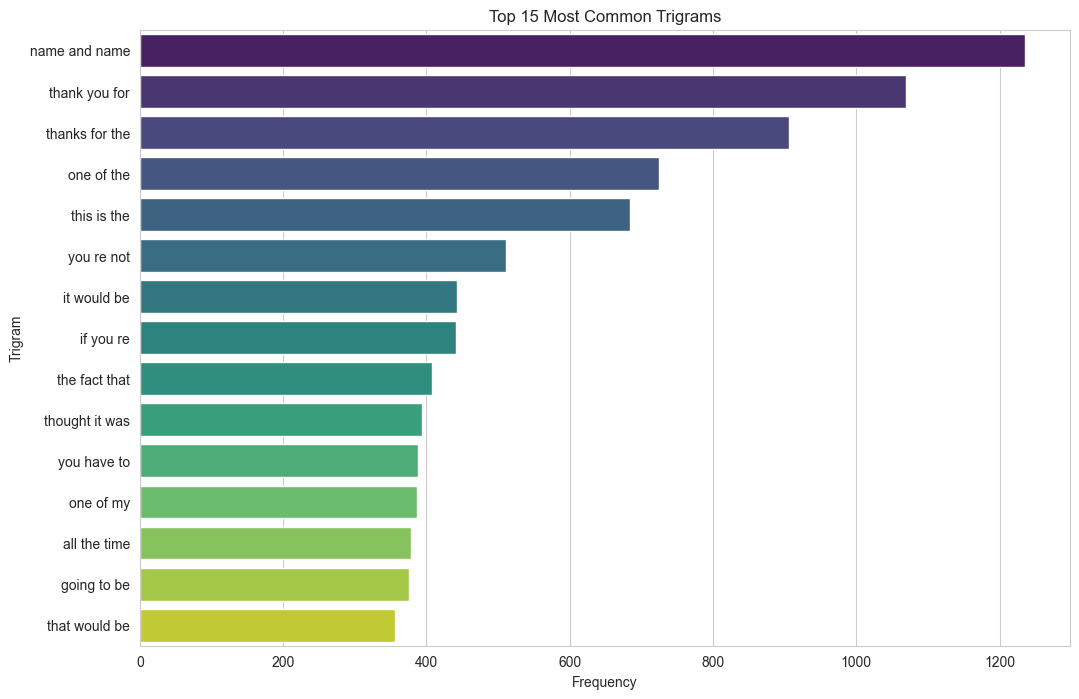

In [ ]:
# Visualize Top Trigrams

# Filter for trigrams
trigram_counts = ngram_counts[ngram_counts['ngram'].str.split().str.len() == 3]

# Get the top trigrams
top_trigrams = trigram_counts.sort_values('count', ascending=False).head(15)

# Create plot
plt.figure(figsize=(12,8))
sns.barplot(x='count', y='ngram', data=top_trigrams, palette='viridis')
plt.title("Top 15 Most Common Trigrams")
plt.xlabel('Frequency')
plt.ylabel("Trigram")
plt.show()